> ERC Starting Grant on COeXISTENCE between humans and machines in urban mobility.


<img src="../../images/img_mileston1.png" alt="Milestone 1 Image" width="500" height="400">

# Title: Comparison of SAC and PPO algorithmS
## Name: Anastasia
### Date: July 22, 2024
---

### Description

> In this notebook, we compare the results of two experiments. In these experiment human agents are training for 100 episodes and then 4 of them mutate to machine agents. Subsequently, the human agents stop learning and the machine learning starts. The machine learning is implemented using the SAC and the PPO algorithm. 
---

## Objective

> The purpose of this notebook is to realise whether the machine training phase is enough and which algorithm seems to perform better.
---

## Experiment Summary

### Network Architecture
- Csomor network
---

### Episodes
- 100 human learning - 200 machine learning
---

### Agents
| **Type**          |           |
|-------------------|---------------------|
| **Number**        | 8 humans(before mutation) -> 4 humans, 4 machines (after mutation) |
| **Total demand** | random |
---



### Origin and Destination Details
| **Origin Count**      | 2                            |
|-----------------------|------------------------------|
| **Destination Count** | 2                            |
| **Origin Pairing**    | 279952229#0, 115604053       |
| **Destination Pairing**| -115602933#2, -441496282#1     |
---

### Time to complete
- 1.20 h
---


    

### Hardware Utilized for Experiment Execution
| **Type of Machine** | Personal computer (or server) |
|----------------------|-------------------------------|
| **CPU**              | 12th Gen Intel(R) Core(TM) i7-1255U |
|                      | Cores: 10                   |
|                      | Sockets: 1                  |
|                      | Base Speed: 1.70 GHz        |
| **Memory**           | 16GB                          |
| **Disc (SSD)**       | 477 GB                        |
| **Operating System** | Windows 11                    |
---


## Initialize libraries and parameters

In [2]:
import sys
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_of_parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir))
sys.path.append(parent_of_parent_dir)

from environment import SumoSimulator
from environment import TrafficEnvironment
from keychain import Keychain as kc
from services import plotter
from services import runner

from create_agents import create_agent_objects
from utilities import check_device
from utilities import get_params
from utilities import set_seeds


In [3]:
params = get_params(kc.PARAMS_PATH)

In [4]:
runner_params = params[kc.RUNNER]

In [5]:
phase_names = runner_params[kc.PHASE_NAMES]
phases = runner_params[kc.PHASES]

## Comparison of human and machine travel time

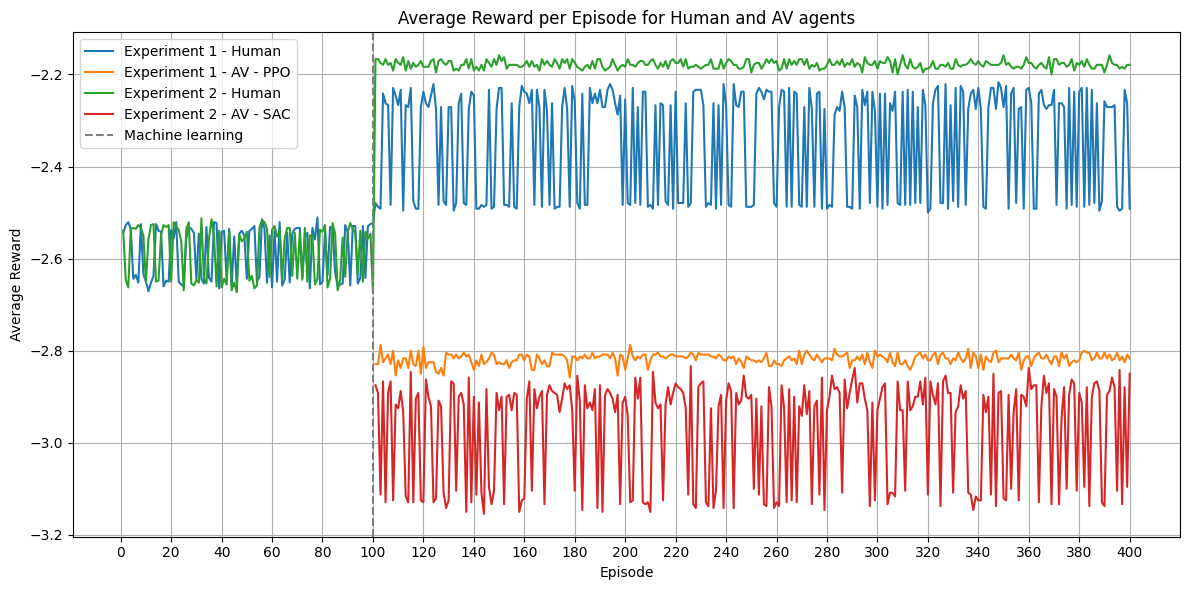

In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_travel_time(folder):
    avg_travel_times = {'Human': [], 'AV': []}
    episodes = os.listdir(folder)
    
    # Extract episode numbers using regular expression
    episode_numbers = [int(re.search(r'(\d+)', episode).group()) for episode in episodes]
    
    # Sort episode numbers
    sorted_episode_numbers = sorted(episode_numbers)
    
    # Create sorted episode filenames
    sorted_episodes = [f"ep{number}.csv" for number in sorted_episode_numbers]

    for episode in sorted_episodes:
        if episode.endswith('.csv'):
            file_path = os.path.join(folder, episode)
            df = pd.read_csv(file_path)
            avg_travel_time_human = df[df['kind'] == 'Human']['reward'].mean()
            avg_travel_time_av = df[df['kind'] == 'AV']['reward'].mean()
            avg_travel_times['Human'].append(avg_travel_time_human)
            avg_travel_times['AV'].append(avg_travel_time_av)
    
    return avg_travel_times

# Replace 'folder1_path' and 'folder2_path' with your actual paths
folder1_path = '../training_records/humans_mutation_ppo_2'
folder2_path = '../training_records/humans_mutation_sac_2'

avg_travel_times_folder1 = calculate_average_travel_time(folder1_path)
avg_travel_times_folder2 = calculate_average_travel_time(folder2_path)

# Plotting
episodes = list(range(1, len(avg_travel_times_folder1['Human']) + 1))

plt.figure(figsize=(12, 6))  # Adjusted plot size

plt.plot(episodes, avg_travel_times_folder1['Human'], label='Experiment 1 - Human')
plt.plot(episodes, avg_travel_times_folder1['AV'], label='Experiment 1 - AV - PPO')
plt.plot(episodes, avg_travel_times_folder2['Human'], label='Experiment 2 - Human')
plt.plot(episodes, avg_travel_times_folder2['AV'], label='Experiment 2 - AV - SAC')

# Vertical line for machine learning milestone
plt.axvline(x=100, color='gray', linestyle='--', label="Machine learning")

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for Human and AV agents')
plt.legend()
plt.grid(True)

# Adjusting tick marks and labels for better readability
plt.xticks(range(0, len(episodes)+1, 20))
plt.yticks(fontsize=10)

plt.tight_layout()  # Improves spacing between subplots and around labels

plt.show()


## Comparison of machine travel time

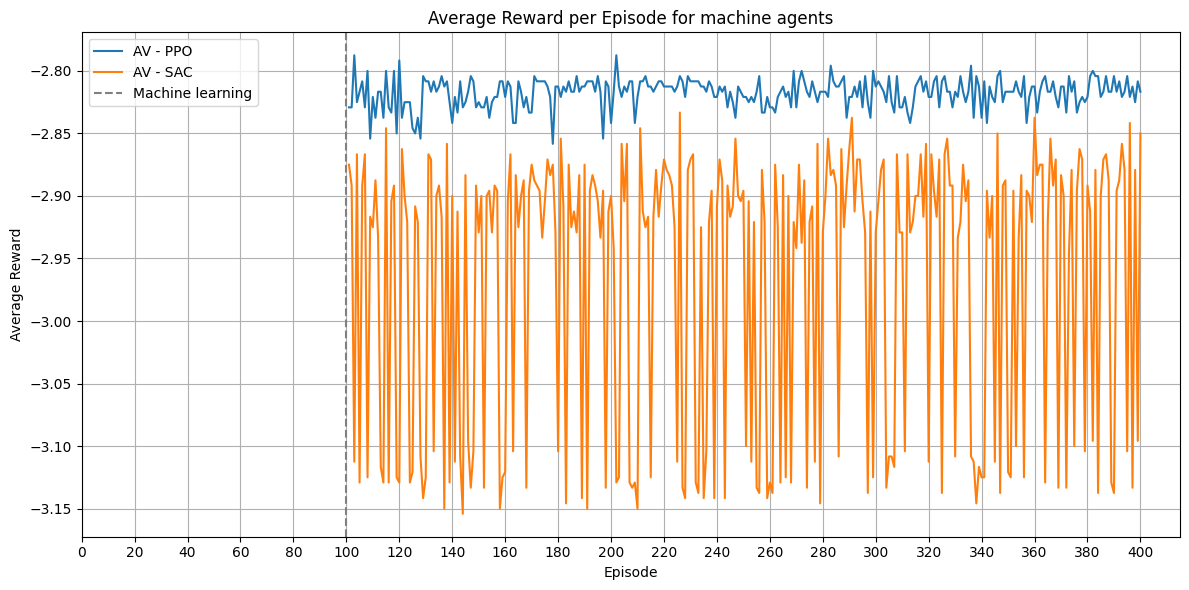

In [8]:
plt.figure(figsize=(12, 6))  # Adjusted plot size

plt.plot(episodes, avg_travel_times_folder1['AV'], label='AV - PPO')
plt.plot(episodes, avg_travel_times_folder2['AV'], label='AV - SAC')

# Vertical line for machine learning milestone
plt.axvline(x=100, color='gray', linestyle='--', label="Machine learning")

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for machine agents')
plt.legend()
plt.grid(True)

# Adjusting tick marks and labels for better readability
plt.xticks(range(0, len(episodes)+1, 20))
plt.yticks(fontsize=10)

plt.tight_layout()  # Improves spacing between subplots and around labels

plt.show()

## Comparison of action distributions

action probabilities are:  {3: {2: 0.36, 0: 0.3433333333333333, 1: 0.2966666666666667}, 4: {2: 0.3433333333333333, 1: 0.33666666666666667, 0: 0.32}, 5: {1: 0.34, 0: 0.33666666666666667, 2: 0.3233333333333333}, 1: {1: 0.36666666666666664, 0: 0.35333333333333333, 2: 0.28}}


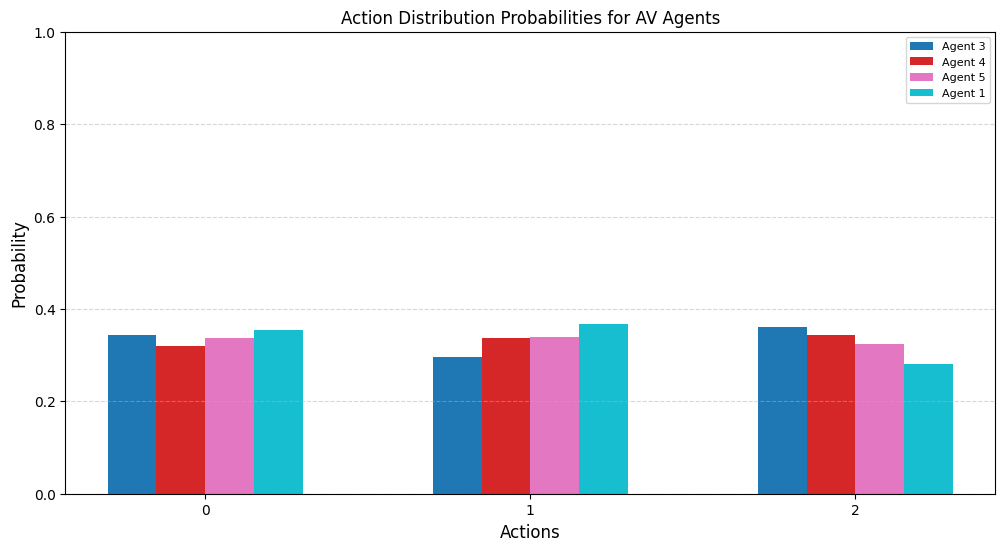

action probabilities are:  {3: {1: 0.9266666666666666, 2: 0.05333333333333334, 0: 0.02}, 4: {0: 0.72, 2: 0.16, 1: 0.12}, 1: {2: 0.46, 0: 0.27666666666666667, 1: 0.2633333333333333}, 2: {0: 0.4166666666666667, 1: 0.34, 2: 0.24333333333333335}}


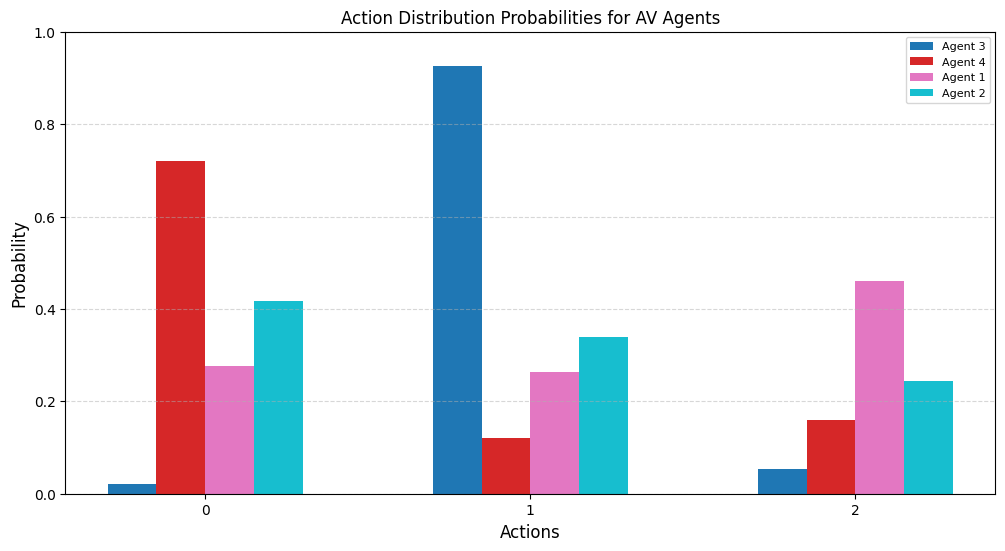

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def calculate_action_distributions(csv_directory, action_column='action', agent_type_column='kind', agent_type='AV'):
    # Initialize dictionaries to store actions data
    action_data = {}
    action_probabilities = {}

    # Read all CSV files in the directory
    for csv_file in os.listdir(csv_directory):
        if csv_file.endswith('.csv'):
            file_path = os.path.join(csv_directory, csv_file)
            df = pd.read_csv(file_path)

            # Filter only 'AV' agents
            av_agents_df = df[df[agent_type_column] == agent_type]

            # Process actions for each 'AV' agent
            for _, row in av_agents_df.iterrows():
                agent_id = row['id']  # Assuming there's an 'agent_id' column
                action = row[action_column]

                if agent_id not in action_data:
                    action_data[agent_id] = []

                action_data[agent_id].append(action)

    # Calculate action probabilities
    for agent_id, actions in action_data.items():
        total_actions = len(actions)
        action_counts = pd.Series(actions).value_counts()
        action_probabilities[agent_id] = {action: count / total_actions for action, count in action_counts.items()}

    return action_probabilities

def plot_action_distributions(action_probabilities):
    plt.figure(figsize=(12, 6))
    num_agents = len(action_probabilities)
    
    # Generate a distinct color for each agent
    colors = plt.cm.tab10(np.linspace(0, 1, num_agents))
    
    # Collect all unique actions across all agents
    all_actions = sorted(set(action for probs in action_probabilities.values() for action in probs.keys()))
    positions = np.arange(len(all_actions))
    
    # Define bar width and create offset positions for each agent
    BAR_WIDTH = 0.15
    
    for idx, (agent_id, probabilities) in enumerate(action_probabilities.items()):
        # Sort actions to match the order of all_actions
        sorted_actions = sorted(probabilities.keys())
        action_vals = [probabilities.get(action, 0) for action in all_actions]

        # Plot bars for each agent
        plt.bar(positions + idx * BAR_WIDTH, action_vals, width=BAR_WIDTH, color=colors[idx], label=f'Agent {agent_id}')

    # Set x-ticks and labels
    plt.xlabel('Actions', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(positions + (num_agents - 1) * BAR_WIDTH / 2, all_actions)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(fontsize=8)
    plt.title('Action Distribution Probabilities for AV Agents')
    plt.show()


# Example usage
folder1_path = '../training_records/humans_mutation_sac_2'
folder2_path = '../training_records/humans_mutation_ppo_2'

folders = [folder1_path, folder2_path]

for folder in folders:
    csv_directory = folder
    action_probabilities = calculate_action_distributions(csv_directory)
    plot_action_distributions(action_probabilities)
